# MILITARY POWER

This dataset allows you to see the world military rankings in 2020 and numerical status s such as the army, navy, and air force.

In addition, some related data such as population and economy related to military power are also included.

<img src='https://i.pinimg.com/236x/35/89/07/358907e171ef5ec7e9cef5f962e6809d.jpg' style='display: block; margin-left: auto; margin-right: auto;'>

<a href='https://www.kaggle.com/code/durmusayuksek/world-military-powers-2020-clustering' target= _blank> Can get data from this link

In [1]:
import pandas as pd
import warnings
import sqlite3
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
pio.templates.default = "plotly_white"
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_excel("World military power.xlsx", skiprows=1)

In [3]:
df.shape

(138, 60)

In [4]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [5]:
# rename Military Strength column as Countries

df.rename(columns={"Military Strength": "Countries"}, inplace=True)

In [6]:
df.head()

,Countries,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [7]:
# Çift indeksli kolonları (0 hariç) silme
columns_to_drop = [col for i, col in enumerate(df.columns) if i % 2 == 0 and i != 0]
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
df.head()

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0


In [9]:
df.shape

(138, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries                                138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [11]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

In [12]:
for c in df.columns:
    if c == 'Countries':
        continue
    if df[c].dtype != 'object':
        continue
    
    df[c] = df[c].astype(str)
    df[c] = df[c].apply(lambda x: 0 if x == "nan" else x)
    df[c] = df[c].str.replace(',', '')
    df[c] = df[c].str.replace('.', '')
    df[c] = pd.to_numeric(df[c])
    df[c] = df[c].apply(lambda x: 0 if x is None else x)

In [13]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

In [14]:
# fill missings by 0
for col in df.columns:
    if col == 'Countries':
        continue
    df[col] = df[col].fillna(0)

In [15]:
df.isnull().sum().sort_values(ascending=False)

Countries                                  0
Submarine Fleet Strength value             0
Total Waterway Coverage value              0
Total Coastline Coverage value             0
Total Square Land Area value               0
Total Population value                     0
Available Manpower value                   0
Proven Oil Reserves value                  0
Oil Consumption value                      0
Oil Production value                       0
Airport Totals value                       0
External Debt value                        0
defense spending budget value              0
Frigate Fleet Strength value               0
Destroyer Fleet Strength value             0
Aircraft Carrier Fleet Strength value      0
Military Strength Power Index              0
Navy Fleet Strengths value                 0
Rocket Projector Strength value            0
Towed Artillery Strength value             0
Self-Propelled Artillery Strength value    0
AFV/APC Strength value                     0
Tank Stren

### Modelling

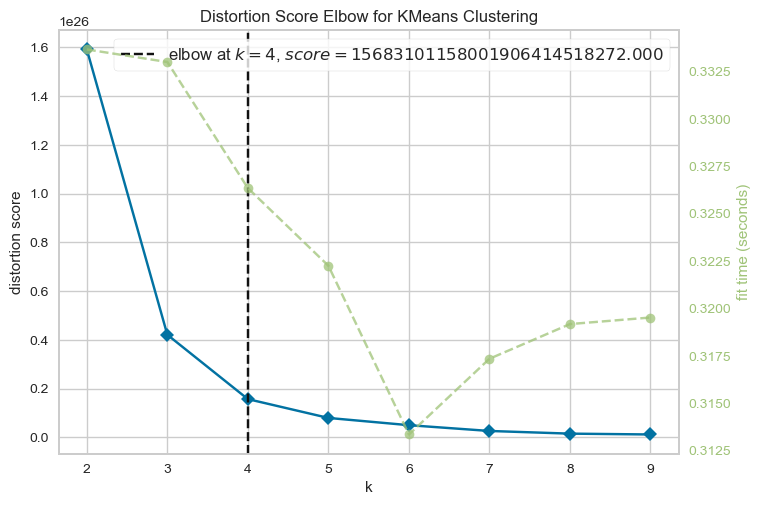

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
x = df.drop("Countries", axis=1)

vis = KElbowVisualizer(KMeans(), k=(2, 10))

vis.fit(x)

vis.show()


In [17]:

model = KMeans(n_clusters=4)
model = model.fit(x)
pred = model.predict(x)

In [18]:


x["cluster"] = pred
df["cluster"] = pred

In [19]:
pred

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [20]:
x

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
0,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0.0,1200,5987.0,0
1,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362.0,41,691.0,0
2,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0,6734.0,0
3,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1600.0,1300,5369.0,0
4,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000,11968.0,0
5,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,0.0,0.0,0.0,0.0,1385000000,10410000000,11,0,47500,0,1696085,3038217,29743,0.0,0,1570.0,0
6,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,26300000000,1714000000000,480,263000,1005000,1821000000,10808002,23470145,7741220,25760.0,2000,0.0,3
7,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,0.0,0.0,0.0,0.0,3380000000,630800000000,52,14260,215000,43000000,4017691,8793370,83871,0.0,0,2524.0,0
8,0.9463,147,17,12,1,29,88,17,570,1451,187,227,162,31.0,0.0,4.0,0.0,1.0,2805000000,17410000000,37,789300,180000,7000000000,5042346,10046516,86600,713.0,0,2468.0,0
9,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39.0,0.0,0.0,0.0,1.0,1415000000,52150000000,4,45000,55000,124600000,806505,1422659,760,161.0,0,0.0,0


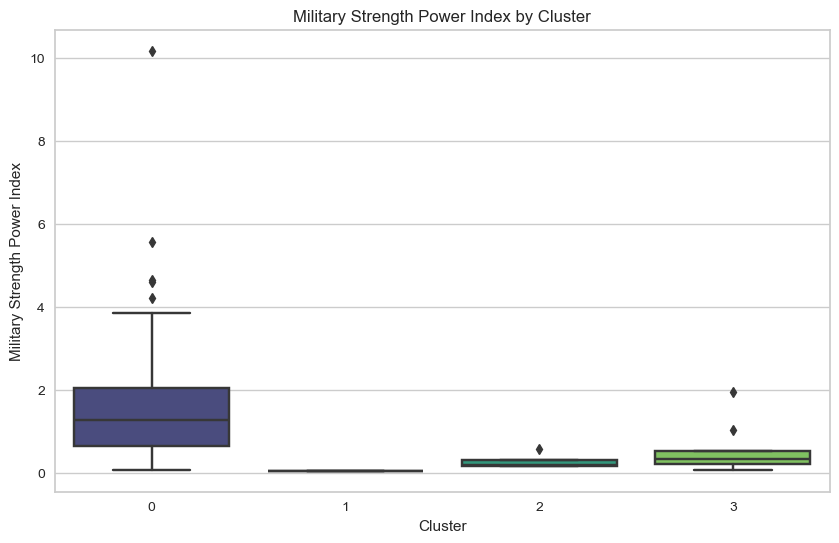

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Military Strength Power Index', data=x, palette='viridis')
plt.title('Military Strength Power Index by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Military Strength Power Index')
plt.show()

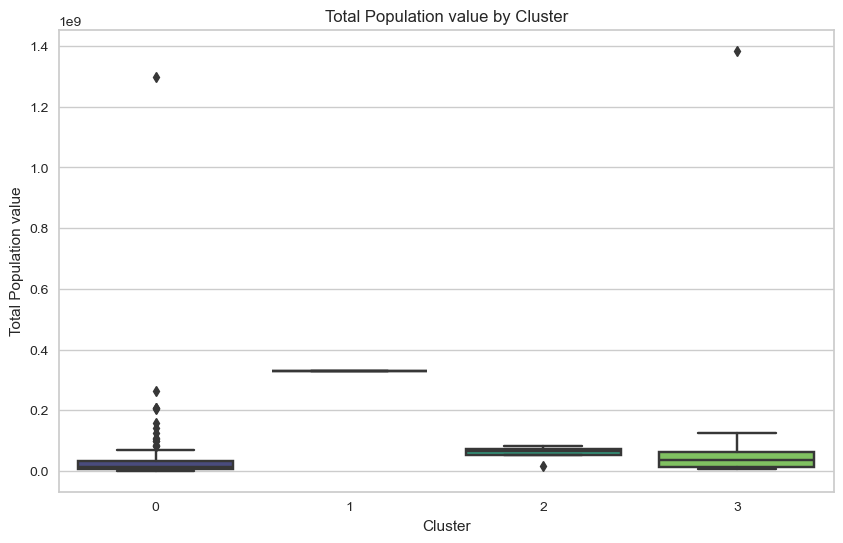

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Total Population value', data=x, palette='viridis')
plt.title('Total Population value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Population value')
plt.show()

In [23]:
df.head()

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0.0,1200,5987.0,0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362.0,41,691.0,0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998.0,0,6734.0,0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1600.0,1300,5369.0,0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,4989.0,11000,11968.0,0


<Figure size 2000x1500 with 0 Axes>

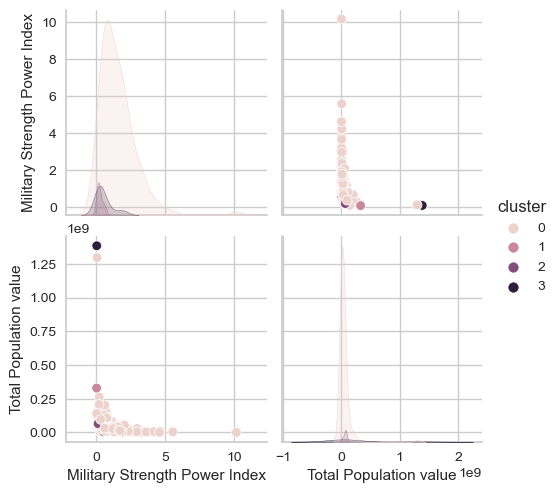

In [24]:
# show Military Strength Power Index, Total population and cluster in a seaborn visualization

plt.figure(figsize=(20, 15))
sns.pairplot(df, hue="cluster", vars=["Military Strength Power Index", "Total Population value"])
plt.show()

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


AttributeError: This method only works with the ScalarFormatter

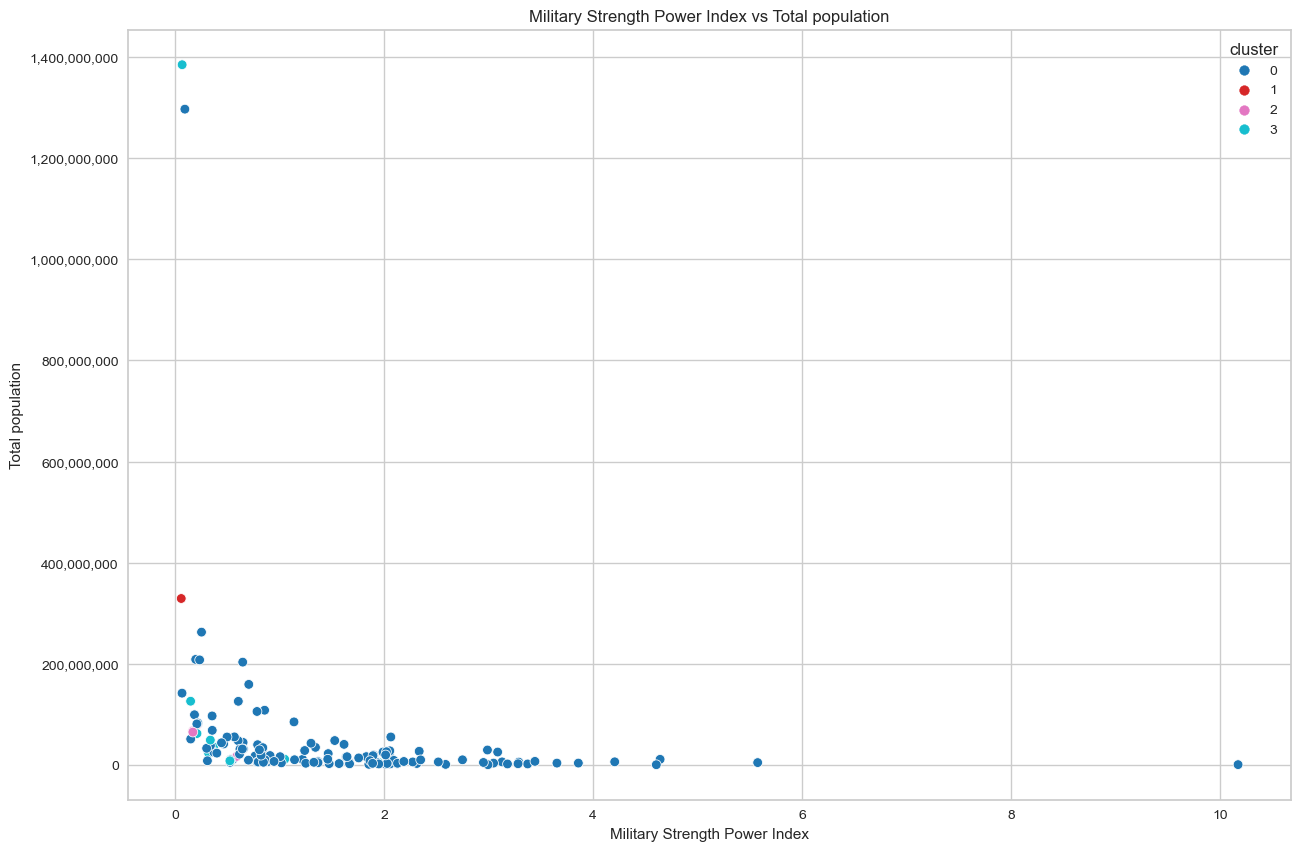

In [26]:


# Define a custom colormap
cmap = LinearSegmentedColormap.from_list('custom', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

def format_population(x, pos):
    return f"{x:,.0f}"



# Create the visualization
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Military Strength Power Index', y='Total Population value', hue='cluster',palette=cmap, data=df)
plt.title('Military Strength Power Index vs Total population')
plt.xlabel('Military Strength Power Index')
plt.ylabel('Total population')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_population))
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [27]:
# Find the most top-left and bottom-right data points : I tried to find left-top and right-bottom countries from scatterplot but can not succeed
min_index = df.idxmin()
max_index = df.idxmax()

print(f"Top-left data point:\nMilitary Strength Power Index: {df.loc[min_index['Military Strength Power Index'], 'Military Strength Power Index']:.2f}")
print(f"Total Population value: {df.loc[min_index['Total Population value'], 'Total Population value']:,.0f}")

print(f"\nBottom-right data point:\nMilitary Strength Power Index: {df.loc[max_index['Military Strength Power Index'], 'Military Strength Power Index']:.2f}")
print(f"Total Population value: {df.loc[max_index['Total Population value'], 'Total Population value']:,.0f}")

Top-left data point:
Military Strength Power Index: 0.06
Total Population value: 597,927

Bottom-right data point:
Military Strength Power Index: 10.17
Total Population value: 1,384,688,986


In [28]:
# Find the most top-left and bottom-right data points
min_index = df.idxmin()
max_index = df.idxmax()

# Get the country names for the top-left and bottom-right data points
top_left_country = df.loc[min_index['Military Strength Power Index'], 'Countries']
bottom_right_country = df.loc[max_index['Total Population value'], 'Countries']

print(f"Top-left data point: {top_left_country}")
print(f"Bottom-right data point: {bottom_right_country}")

Top-left data point: United States
Bottom-right data point: China
